# Correlation

## Getting our data

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Getting Sleep and GPA Data

Get the sleep dataframe, it is called "SleepStudy.csv" and save it to the variable sleep_study

In [5]:
sleep_study = ...

,Unnamed: 0,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,PoorSleepQuality,Stress,Happiness,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter
0,0,0,4,0,0,3.60,0,4,normal,28,25.75,8.70,7.70,25.75,9.50,5.88,7.18,0
1,1,0,4,2,1,3.24,0,6,normal,25,25.70,8.20,6.80,26.00,10.00,7.25,6.93,0
2,2,0,4,0,0,2.97,12,18,normal,17,27.44,6.55,3.00,28.00,12.59,10.09,5.02,0
3,3,0,1,5,1,3.76,0,9,normal,32,23.50,7.17,6.77,27.00,8.00,7.25,6.90,0
4,4,0,4,0,0,3.20,4,9,normal,15,25.90,8.67,6.09,23.75,9.50,7.00,6.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,1,3,0,0,3.35,7,11,high,16,26.75,9.42,6.77,24.50,10.50,9.50,7.55,1
249,249,0,1,2,1,3.00,1,9,normal,20,23.60,8.63,9.03,24.50,10.00,9.50,9.17,0
250,250,0,3,2,1,3.50,1,2,normal,35,24.45,8.25,7.80,25.00,9.75,8.75,8.07,0
251,251,1,2,2,1,2.60,0,5,normal,31,24.38,9.20,8.97,26.00,9.88,7.50,8.55,0


In [6]:
sleep_study = pd.concat([sleep_study, pd.get_dummies(sleep_study["Stress"]).rename(columns={"high": "High Stress", "normal": "Normal Stress"})], axis=1).drop(columns=["Stress"]).drop(columns=["Unnamed: 0"])
sleep_study

,Gender,ClassYear,NumEarlyClass,EarlyClass,GPA,ClassesMissed,PoorSleepQuality,Happiness,WeekdayBed,WeekdayRise,WeekdaySleep,WeekendBed,WeekendRise,WeekendSleep,AverageSleep,AllNighter,High Stress,Normal Stress
0,0,4,0,0,3.60,0,4,28,25.75,8.70,7.70,25.75,9.50,5.88,7.18,0,0,1
1,0,4,2,1,3.24,0,6,25,25.70,8.20,6.80,26.00,10.00,7.25,6.93,0,0,1
2,0,4,0,0,2.97,12,18,17,27.44,6.55,3.00,28.00,12.59,10.09,5.02,0,0,1
3,0,1,5,1,3.76,0,9,32,23.50,7.17,6.77,27.00,8.00,7.25,6.90,0,0,1
4,0,4,0,0,3.20,4,9,15,25.90,8.67,6.09,23.75,9.50,7.00,6.35,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,3,0,0,3.35,7,11,16,26.75,9.42,6.77,24.50,10.50,9.50,7.55,1,1,0
249,0,1,2,1,3.00,1,9,20,23.60,8.63,9.03,24.50,10.00,9.50,9.17,0,0,1
250,0,3,2,1,3.50,1,2,35,24.45,8.25,7.80,25.00,9.75,8.75,8.07,0,0,1
251,1,2,2,1,2.60,0,5,31,24.38,9.20,8.97,26.00,9.88,7.50,8.55,0,0,1


## Data Exploration

Let's use our pandas skills to understand the dataframe. Use the pandas describe function in the cell below.

Filter the dataframe to get only rows where GPA is greater than 3.85.

Filter the dataframe to get only rows with class year being 2.

Filter the dataframe to find people who had an average sleep under 7 and high stress is true (1).

### Scatter Plots

Below, you can see a scatter plot comparing the relationship between what time the person goes to bed on a weekday and what time they wake up on a weekday.

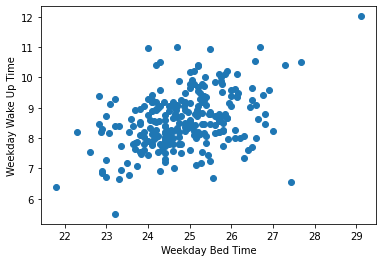

In [106]:
plt.scatter(sleep_study["WeekdayBed"], sleep_study["WeekdayRise"])
plt.xlabel("Weekday Bed Time")
plt.ylabel("Weekday Wake Up Time");

As the person goes to bed later, what happens to the time they wake up?

Make a scatter plot of some other variables in the table! For example, you can look at a scatter plot comparing GPA and number of classes missed!

### Correlations Between Variables

There are many functions in Python that make coding easier for us! One of the things is that there is a built in function .corr that calculates for correlation for us! In the example below, we will see that using the formula for correlation and the Python correlation function yield the same result!

We will be calculating the correlation between classes missed and GPA

Using the Python .corr() function:

In [93]:
round(sleep_study[sleep_study.columns[1:]].corr()['ClassesMissed'][:-1]["GPA"],5)

-0.18154

Try and use the formula on the slide to calculate the correlation. You should get the same answer. In the cell below I put some start code.

In [108]:
x_values = ...
y_values = ...
x_mean = sum(...)/len(...)
y_mean = sum(...)/len(...)
numerator = sum((... - ...) * (... - ...))
denominator = np.sqrt(sum((... - ...)**2)*sum((... - ...)**2))
round(numerator/denominator, 5)

The chart below shows the correlations between all of the variables. Look at the legend to understand the chart.

<ipython-input-95-6f497342d512>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sleep_study_corr = sleep_study_corr.where(np.tril(np.ones(sleep_study_corr.shape)).astype(np.bool))


<AxesSubplot:>

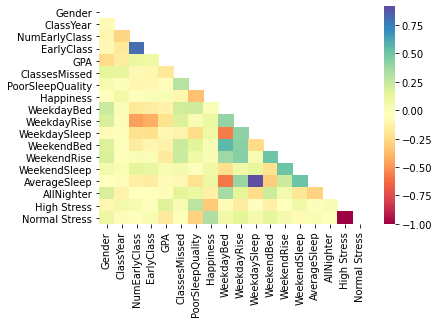

In [95]:
sleep_study_corr = sleep_study.corr(method='pearson') 
np.fill_diagonal(sleep_study_corr.values, np.nan)
sleep_study_corr = sleep_study_corr.where(np.tril(np.ones(sleep_study_corr.shape)).astype(np.bool))
sns.heatmap(sleep_study_corr,cmap="Spectral")

## Answer the questions below.

Does anything in the chart surprise you? Were there variables you thought would be correlated but were not?

Which variables are the most positively correlated?

Which variables are the most negatively correlated?

Which variables do you think would be the most helpful in determing student GPA?

## Correlations between GPA and the Other Features

The chart below shows the correlations between GPA and other features in the table. Use the chart to answer the questions about the relationships between these variables.

<AxesSubplot:xlabel='Variables'>

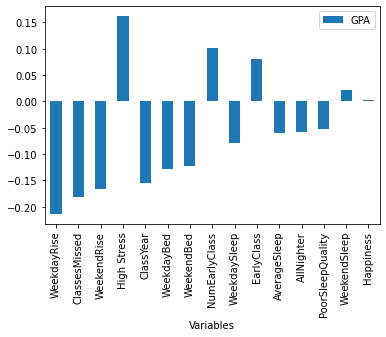

In [54]:
gpa_corr = sleep_study[sleep_study.columns[1:]].corr()['GPA'][:-1].to_frame().reset_index().rename(columns={"index": "Variables"})
gpa_corr = gpa_corr.drop([3])
gpa_corr = gpa_corr.reindex(gpa_corr.GPA.abs().sort_values(ascending=False).index)
gpa_corr.plot.bar(x='Variables', y='GPA', rot=90)

## Answer the questions below.

Are you suprised which variables are most correlated with GPA? Why?

Are you suprised which variables are least correlated with GPA? Why?

Which other variables (not in the data) do you think would help predict student GPA?

## Just for fun, here is the same data, but instead looking at the correlations between Happiness and the Other Features

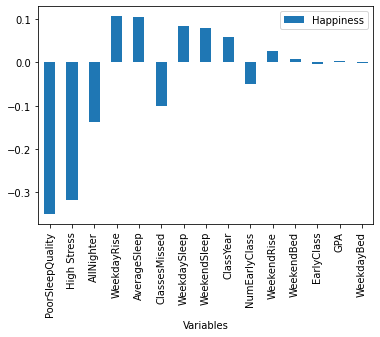

In [107]:
happy_corr = sleep_study[sleep_study.columns[1:]].corr()['Happiness'][:-1].to_frame().reset_index().rename(columns={"index": "Variables"})
happy_corr = happy_corr.drop([6])
happy_corr = happy_corr.reindex(gpa_corr.Happiness.abs().sort_values(ascending=False).index)
happy_corr.plot.bar(x='Variables', y='Happiness', rot=90);

## Analysis

In [2]:
import pandas as pd
sleep = pd.read_csv("SleepStudy.csv")

Find the average GPA in the sleep dataframe.

In [6]:
average = sleep["GPA"].mean()

Use online resources to find out how to create a new column in a dataframe. Add a column to the dataframe that is True or False (boolean) column indicating if the person has a GPA above the avergae GPA or a GPA lower than the average GPA.

Now that you have this new column, you can use it to filter the entire dataset. Try to see if you can find any notable differences between the two groups. 

What differences did you find? What similarities did you find?